In [1]:
import os
import sys
base_directory = "/Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/"
sys.path.append(f"{base_directory}")

In [2]:
from src.utils.config_reader import ConfigReader, Logger
from src.utils.utils import GeoDataFrameOperations
from src.utils.file_pocessor import FileLister, FileProcessor

In [3]:
# Create an instance of the Logger
log_directory = "/Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/data/nepal/outputs/log"
log_file_name = "preprocessing"
logger = Logger(log_directory, log_file_name)

In [7]:
# Readding the configuration file to the preprocessing
config_file_path = "config/nepal/data_setup.yaml"
config_file_path = f"{base_directory}{config_file_path}"

try:
    config_data = ConfigReader.read_yaml_file(config_file_path)
    # config_data = config_data['preprocessing']
    txt_msg = "Content of {} file successfully read".format(config_file_path)
    logger.info(txt_msg)
except Exception as e:
    txt_msg = f"Error reading configuration file: {str(e)}"
    logger.error(txt_msg)

INFO: Content of /Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/config/nepal/data_setup.yaml file successfully read


In [27]:
# Identifying modules for preprocessing
items_preprocessing = ['hazards', 'infrastructures', 'population']
hazards_task = None
infrastructures_task = None
population_task = None

items_config_data = [task for task in config_data]
try:
    for item in items_preprocessing:
        if item not in items_config_data:
            raise ValueError(f"Item {item} not found in config_data list")
    txt_msg = f"All elements are present in config_data list: {str(items_config_data)}"
    logger.info(txt_msg)
except ValueError as e:
    txt_msg = f"'{e}'"
    logger.error(txt_msg)
    

try:
    for task in items_config_data:
        if task == "hazards":
            hazards_task = config_data[task]
        elif task == "infrastructures":
            infrastructures_task = config_data[task]
        # elif task == "population":
        #     population_task = config_data[task]
        else:
            raise ValueError(f"Unexpected task '{task}' found in config data")
    txt_msg = f"Tasks successfully extracted from config data"
    logger.info(txt_msg)
except KeyError as e:
    txt_msg = f"Error: '{e}' not found in config data"
    logger.error(txt_msg)
except ValueError as e:
    txt_msg = f"Error: {e}"
    logger.error(txt_msg)
except Exception as e:
    txt_msg = f"An unexpected error occurred: {str(e)}"
    logger.error(txt_msg)


ERROR: 'Item hazards not found in config_data list'
ERROR: Error: Unexpected task 'preprocessing' found in config data


In [6]:
# Write different types of messages to the log file
# logger.info('Information message')
# logger.warning('Warning message')
# logger.error('Error message')
# logger.critical('Critical message')
# logger.debug('Debug message')


In [7]:
# Processing Hazards task
for task in hazards_task:
    task_type = task['type']
    task_historical = task['historical']
    return_periods = task['return_periods']
    substantial_damage = task['substantial_damage']
    complete_destruction = task['complete_destruction']
    input_path = f"{base_directory}{task['source']}"
    output_path = f"{base_directory}{task['destination']}"

    if task_historical:
        txt_msg = f"The file contents historical records for {task_type}"
        files = FileLister.list_files(input_path)
        
        try:
            file = files[0]
        except Exception as e:
            txt_msg = f"Error: '{e}'"
            logger.error(txt_msg)
  
            
            
        # Read valid files
        file_name = file[0]
        file_path = file[1]  
            
        txt_msg = f"Processing historical file"
        print(txt_msg)
        
        # Transforming raster
        gdf = FileProcessor.read_tif(file_path, 'polygon')
        # Column damage generation
        gdf = GeoDataFrameOperations.calculate_damage(gdf, substantial_damage, complete_destruction)
        # Save file
        output_name = f'{task_type}_historical.gpkg'
        FileProcessor.save_to_geopackage(gdf, output_path, output_name)

        
    else:
        txt_msg = f"The file contents periodical records for {task_type}"
        files = FileLister.list_files(input_path)
        valid_files = []
        counters = 1
        for period in return_periods:
            validate_period = False
            counters = 0
            while not validate_period and counters <len(files):
                if str(period) in files[counters][0]:
                    validate_period = True
                    valid_files.append([period, files[counters][0], files[counters][1]])
                counters+=1
        
        if set(return_periods) != set([f[0] for f in valid_files]):
            elements_not_in_set = set(return_periods)  - set([f[0] for f in valid_files])
            txt_msg = f"Some periods files not found {elements_not_in_set}"
            print(txt_msg)
        else:
            txt_msg = f"All periods files found"
            print(txt_msg)
            
                    
        # Read valid files 
        for file in valid_files:
            file_period = file[0]
            file_name = file[1]
            file_path = file[2]
            
            txt_msg = f"Processing period {file_period}: {file_name}"
            print(txt_msg)
            
            txt_msg = f"{file_path}"
            print(txt_msg)
            
            # Transforming raster
            gdf = FileProcessor.read_tif(file_path, 'polygon')
            # Column damage generation
            gdf = GeoDataFrameOperations.calculate_damage(gdf, substantial_damage, complete_destruction)
            # print(gdf['value'].sum())
            # Save file
            output_name = f'{task_type}_period_{file_period}.gpkg'
            FileProcessor.save_to_geopackage(gdf, output_path, output_name)


All periods files found
Processing period 475: pga_2475.tif
/Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/data/nepal/inputs/hazards/Global_earthquake_hazard_WB/pga_2475.tif


100%|██████████| 361/361 [00:01<00:00, 239.28it/s]


Processing period 975: pga_975.tif
/Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/data/nepal/inputs/hazards/Global_earthquake_hazard_WB/pga_975.tif


100%|██████████| 361/361 [00:01<00:00, 243.21it/s]


Processing period 1500: pga_1500.tif
/Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/data/nepal/inputs/hazards/Global_earthquake_hazard_WB/pga_1500.tif


100%|██████████| 361/361 [00:01<00:00, 226.51it/s]


Processing period 2475: pga_2475.tif
/Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/data/nepal/inputs/hazards/Global_earthquake_hazard_WB/pga_2475.tif


100%|██████████| 361/361 [00:01<00:00, 231.64it/s]


Processing historical file


100%|██████████| 361/361 [00:01<00:00, 230.91it/s]


In [9]:

output_files = f"{base_directory}{config_data['output_files']}"
output_files


'/Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/data/nepal/outputs/'

### Population

In [20]:
attribute = 'population'
try :
    population_task = config_data[attribute]
except Exception as e:
    population_task = None
    txt_msg = f"Atribute {str(e)} not found"
    logger.error(txt_msg)

attribute_destinity = f"{output_files}{attribute}/"
if not os.path.exists(attribute_destinity):
    os.makedirs(attribute_destinity)

In [21]:
# Processing Population task
for task in population_task:
    task_type = task['name']
    input_path = f"{base_directory}{task['source']}"
    txt_msg = f"Processing population file: {input_path}"
    logger.info(txt_msg)
    
    # Transforming raster
    try:
        gdf = FileProcessor.read_tif(input_path, 'polygon')
        gdf.columns = ['band', 'population', 'geometry']
        gdf = gdf[['population', 'geometry']]
        # gdf['geometry'] = gdf.geometry.centroid
    except Exception as e:
        txt_msg = f"{str(e)}"
        logger.error(txt_msg)       
    
    # Saving file
    try:
        output_name = f'{task_type}.gpkg'
        FileProcessor.save_to_geopackage(gdf, attribute_destinity, output_name)
        txt_msg = f"Successfully file processed"
        logger.info(txt_msg)
    except Exception as e:
        txt_msg = f"{str(e)}"
        logger.error(txt_msg) 


INFO: Processing population file: /Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/data/nepal/inputs/popu/nepal_npl_ct_popu_pop_sp_py_GHS_2023_p_u_Clipped_E2020_Nepal_4326.tif


100%|██████████| 4919/4919 [01:33<00:00, 52.46it/s] 


INFO: Successfully file processed


### Infrastructure

In [18]:
attribute = 'infrastructures'
try :
    infrastructures_task = config_data[attribute]
except Exception as e:
    infrastructures_task = None
    txt_msg = f"Atribute {str(e)} not found"
    logger.error(txt_msg)

attribute_destinity = f"{output_files}{attribute}/"
if not os.path.exists(attribute_destinity):
    os.makedirs(attribute_destinity)



In [19]:
# Processing Infrastructure task
for task in infrastructures_task:
    task_type = task['name']
    task_filter= task['filter']
    input_path = f"{base_directory}{task['source']}"
    
    txt_msg = f"Processing population file: {input_path}"
    logger.info(txt_msg)
    
    # Transforming raster
    try:
        gdf = FileProcessor.read_geopackage(input_path)
        if task_filter is not None:
            for filter_str in task_filter:
                gdf = gdf.query(filter_str)
                gdf = gdf.reset_index(drop=True)
    except Exception as e:
        txt_msg = f"{str(e)}"
        logger.error(txt_msg) 
            
    # Saving file
    try:
        output_name = f'{task_type}_infrastructure.gpkg'
        FileProcessor.save_to_geopackage(gdf, attribute_destinity, output_name)
        txt_msg = f"Successfully file processed"
        logger.info(txt_msg)
    except Exception as e:
        txt_msg = f"{str(e)}"
        logger.error(txt_msg) 
    

INFO: Processing population file: /Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/data/nepal/inputs/heal/nepal_npl_ct_heal_heal_sp_tab_NDRRNA_14022024.gpkg
INFO: Successfully file processed
INFO: Processing population file: /Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/data/nepal/inputs/heal/nepal_npl_ct_heal_heal_sp_tab_NDRRNA_14022024.gpkg
INFO: Successfully file processed


### Hazards

In [10]:
attribute = 'hazards'
try :
    hazards_task = config_data[attribute]
except Exception as e:
    hazards_task = None
    txt_msg = f"Atribute {str(e)} not found"
    logger.error(txt_msg)

attribute_destinity = f"{output_files}{attribute}/"
if not os.path.exists(attribute_destinity):
    os.makedirs(attribute_destinity)

In [11]:
# Processing Hazards task
for task in hazards_task:
    task_name = task['name']
    task_historical = task['historical']
    return_periods = task['return_periods']
    substantial_damage = task['substantial_damage']
    complete_destruction = task['complete_destruction']
    input_path = f"{base_directory}{task['source']}"
    
    print(task)
    if task_historical:
        txt_msg = f"The file contents historical records for {task_type}"
        files = FileLister.list_files(input_path)
        
        # Read valid files
        try:     
            file = files[0]
            file_name = file[0]
            file_path = file[1]  
        except Exception as e:
            txt_msg = f"Error: '{e}'"
            logger.error(txt_msg)

         # Saving file
        try:
            output_name = f'{task_type}.gpkg'
            FileProcessor.save_to_geopackage(gdf, attribute_destinity, output_name)
            txt_msg = f"Successfully file processed"
            logger.info(txt_msg)
        except Exception as e:
            txt_msg = f"{str(e)}"
            logger.error(txt_msg) 
                
        
            
        txt_msg = f"Processing historical file"
        print(txt_msg)
        
        # Transforming raster
        gdf = FileProcessor.read_tif(file_path, 'polygon')
        # Column damage generation
        gdf = GeoDataFrameOperations.calculate_damage(gdf, substantial_damage, complete_destruction)
        # Save file
        output_name = f'{task_type}_historical.gpkg'
        FileProcessor.save_to_geopackage(gdf, output_path, output_name)

        

{'name': 'earthquakes', 'source': 'data/nepal/inputs/hazards/Global_earthquake_hazard_WB/', 'map_unit': 'cm/s^2', 'return_periods': [475, 975, 1500, 2475], 'substantial_damage': 0.01, 'complete_destruction': None, 'destination': 'data/nepal/outputs/hazards/', 'historical': False}
{'name': 'landslides', 'source': 'data/nepal/inputs/hazards/landslides/', 'map_unit': '', 'return_periods': None, 'substantial_damage': None, 'complete_destruction': None, 'destination': 'data/nepal/outputs/hazards/', 'historical': True}


### END

In [11]:
attribute_destinity

'/Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/data/nepal/outputs/infrastructures/'

In [13]:
gdf

,GHFD_ID,HF_ID_N,HF_N_RO,HF_N_LOC,HF_T_RO,HF_T_LO,HF_OWN,HF_ADD_STR,HF_ADD_NO,HF_ADD_PC,...,S_COOR,M_COOR,AC_COOR,ADM1_C,ADM1_N_RO,ADM2_C,ADM2_N_RO,ADM3_C,ADM3_N_RO,geometry
0,None,None,"1,50,02,13,101",None,Health Post,None,None,None,None,None,...,NDRRNA,None,None,NPL-ADM1-38925275B99974579,Lumbini,NPL-ADM2-48590121B71411499,ARGHAKHANCHI,NPL-ADM3-92635248B26954669,Sandhikharka,POINT (83.09822 28.02166)
1,None,None,"2,90,05,40,101",None,Hospital,None,None,None,None,None,...,NDRRNA,None,None,NPL-ADM1-38925275B3223679,Bagmati,NPL-ADM2-48590121B38233782,RASUWA,NPL-ADM3-92635248B80242974,Gosaikunda,POINT (85.29664 28.11224)
2,None,None,32 Dental Care,None,Dental Clinic,None,None,None,None,None,...,NDRRNA,None,None,NPL-ADM1-38925275B61643740,Gandaki,NPL-ADM2-48590121B48278102,KASKI,NPL-ADM3-92635248B52656349,Pokhara Lekhnath,POINT (84.05683 28.16277)
3,None,None,?? ??? ???????? ??????? ??? ????????? ??????,None,Hospital,None,None,None,None,None,...,NDRRNA,None,None,NPL-ADM1-38925275B72368611,Province 1,NPL-ADM2-48590121B53695686,JHAPA,NPL-ADM3-92635248B18880049,Bhadrapur,POINT (88.08037 26.55999)
4,None,None,??? ????????,None,Veterinary,None,None,None,None,None,...,NDRRNA,None,None,NPL-ADM1-38925275B31954132,Province 2,NPL-ADM2-48590121B93826412,RAUTAHAT,NPL-ADM3-92635248B98783072,Rajdevi,POINT (85.30761 26.76909)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6658,None,None,unani aushadhalaya,None,Pharmacy,None,None,None,None,None,...,NDRRNA,None,None,NPL-ADM1-38925275B3223679,Bagmati,NPL-ADM2-48590121B68869127,LALITPUR,NPL-ADM3-92635248B95483039,Lalitpur,POINT (85.31507 27.68067)
6659,None,None,unique collage of medecal science and hospital,None,Hospital,None,None,None,None,None,...,NDRRNA,None,None,NPL-ADM1-38925275B31954132,Province 2,NPL-ADM2-48590121B79767844,SAPTARI,NPL-ADM3-92635248B77151568,Rupani,POINT (86.72266 26.59899)
6660,None,None,veterinary clinic,None,Veterinary,None,None,None,None,None,...,NDRRNA,None,None,NPL-ADM1-38925275B3223679,Bagmati,NPL-ADM2-48590121B82193346,KATHMANDU,NPL-ADM3-92635248B7890871,Kathmandu,POINT (85.34854 27.69868)
6661,None,None,अस्पताल,None,Other,None,None,None,None,None,...,NDRRNA,None,None,NPL-ADM1-38925275B99974579,Lumbini,NPL-ADM2-48590121B71411499,ARGHAKHANCHI,NPL-ADM3-92635248B78015542,Sitganga,POINT (83.05293 27.88568)


In [15]:
output_path = f"{attribute_destinity}{output_name}"
gdf.to_file(output_path, layer=None, driver="GPKG")

DriverError: sqlite3_open(/Users/johnbarrera/Documents/Projects/world_bank/Climate-and-Disaster-Risk-Management-for-Health-Systems/data/nepal/outputs/infrastructures/healt_facilities_infrastructure.gpkg) failed: unable to open database file

<Axes: >

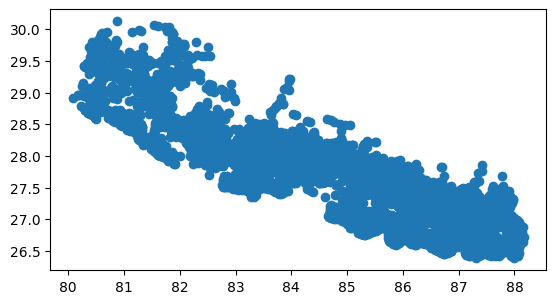

In [16]:
gdf.plot()